In [1]:
pip install wordcloud

In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Import

In [6]:
path = 'tweet14.csv'
df = pd.read_csv(path)
df.head()

,date_time,username,user_location,user_description,verified,followers_count,following_count,tweet_like_count,tweet_retweet_count,tweet_reply_count,source,tweet_text
0,2022-09-08 22:49:27+00:00,TheJessicats,1999,Tweet like nobody’s reading • standup comedian...,False,1642,1444,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",@Travon I hope it happens before my iPhone 14 ...
1,2022-09-08 22:49:16+00:00,itschefnotjeff,📌 mom's basement,👨🏽‍💻💳🎫✈️,False,77,87,0,0,0,"<a href=""http://twitter.com/download/android"" ...","Nah iphone 14 upgrade just not it, change my m..."
2,2022-09-08 22:49:09+00:00,HalfRonin,Between the darkness and light,Preferring to be the dumbest person in the roo...,False,549,717,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",To the shock of absolutely no one: \n\nApple: ...
3,2022-09-08 22:49:09+00:00,Deejayrayman,Texas,Father of 3. Follower of Christ. Lover of all ...,False,48,153,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",@TMobile @TMobileHelp will you be able to orde...
4,2022-09-08 22:48:54+00:00,TheGalox_,Hello!,"The latest Tech, Aviation, Gaming and Car news...",False,30309,193,3,0,0,"<a href=""http://twitter.com/download/android"" ...",China's four major carriers do not support the...


remove and change column name

In [7]:
columns_to_remove = ['verified', 'source','user_description']  # Replace with the actual column names you want to remove
df.drop(columns=columns_to_remove, inplace=True)

# Change column names
new_column_names = {'tweet_like_count': 'likes', 'tweet_retweet_count': 'retweet', 'user_location': 'location', 'followers_count': 'follower', 'following_count': 'following', 'tweet_reply_count': 'reply'}  # Replace with the actual column names you want to change
df.rename(columns=new_column_names, inplace=True)

# Print the modified DataFrame
df.head()

,date_time,username,location,follower,following,likes,retweet,reply,tweet_text
0,2022-09-08 22:49:27+00:00,TheJessicats,1999,1642,1444,0,0,0,@Travon I hope it happens before my iPhone 14 ...
1,2022-09-08 22:49:16+00:00,itschefnotjeff,📌 mom's basement,77,87,0,0,0,"Nah iphone 14 upgrade just not it, change my m..."
2,2022-09-08 22:49:09+00:00,HalfRonin,Between the darkness and light,549,717,0,0,0,To the shock of absolutely no one: \n\nApple: ...
3,2022-09-08 22:49:09+00:00,Deejayrayman,Texas,48,153,0,0,0,@TMobile @TMobileHelp will you be able to orde...
4,2022-09-08 22:48:54+00:00,TheGalox_,Hello!,30309,193,3,0,0,China's four major carriers do not support the...


cleaning

In [8]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','', text)
    text = re.sub(r'#','', text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?:\/\/\S+','',text) # remove links
    return text

df['tweet_text'] = df['tweet_text'].apply(cleanTxt)
df.head()

,date_time,username,location,follower,following,likes,retweet,reply,tweet_text
0,2022-09-08 22:49:27+00:00,TheJessicats,1999,1642,1444,0,0,0,I hope it happens before my iPhone 14 arrives.
1,2022-09-08 22:49:16+00:00,itschefnotjeff,📌 mom's basement,77,87,0,0,0,"Nah iphone 14 upgrade just not it, change my m..."
2,2022-09-08 22:49:09+00:00,HalfRonin,Between the darkness and light,549,717,0,0,0,To the shock of absolutely no one: \n\nApple: ...
3,2022-09-08 22:49:09+00:00,Deejayrayman,Texas,48,153,0,0,0,will you be able to order the iPhone 14 Pro ...
4,2022-09-08 22:48:54+00:00,TheGalox_,Hello!,30309,193,3,0,0,China's four major carriers do not support the...


Find Subjectivity and Polarity of tweets

In [9]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['tweet_text'].apply(getSubjectivity)
df['Polarity'] = df['tweet_text'].apply(getPolarity)
df.head()

,date_time,username,location,follower,following,likes,retweet,reply,tweet_text,Subjectivity,Polarity
0,2022-09-08 22:49:27+00:00,TheJessicats,1999,1642,1444,0,0,0,I hope it happens before my iPhone 14 arrives.,0.0000,0.0000
1,2022-09-08 22:49:16+00:00,itschefnotjeff,📌 mom's basement,77,87,0,0,0,"Nah iphone 14 upgrade just not it, change my m...",0.0000,0.0000
2,2022-09-08 22:49:09+00:00,HalfRonin,Between the darkness and light,549,717,0,0,0,To the shock of absolutely no one: \n\nApple: ...,0.3800,0.0200
3,2022-09-08 22:49:09+00:00,Deejayrayman,Texas,48,153,0,0,0,will you be able to order the iPhone 14 Pro ...,0.8125,0.2500
4,2022-09-08 22:48:54+00:00,TheGalox_,Hello!,30309,193,3,0,0,China's four major carriers do not support the...,0.5000,0.0625


Make a wordcloud

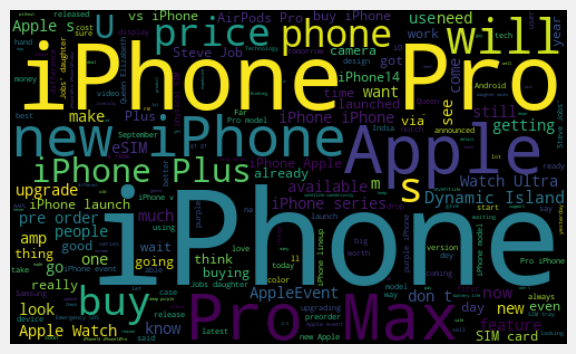

In [10]:
allWords=''.join([twts for twts in df['tweet_text']])
wordCloud=WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate (allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Classify tweets with Positive, Negative and Neutral

In [11]:
def getAnalysis(score):
  if(score<0):
    return 'Negative'
  elif(score>0):
    return 'Positive'
  else:
    return 'Neutral'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df.head()

,date_time,username,location,follower,following,likes,retweet,reply,tweet_text,Subjectivity,Polarity,Analysis
0,2022-09-08 22:49:27+00:00,TheJessicats,1999,1642,1444,0,0,0,I hope it happens before my iPhone 14 arrives.,0.0000,0.0000,Neutral
1,2022-09-08 22:49:16+00:00,itschefnotjeff,📌 mom's basement,77,87,0,0,0,"Nah iphone 14 upgrade just not it, change my m...",0.0000,0.0000,Neutral
2,2022-09-08 22:49:09+00:00,HalfRonin,Between the darkness and light,549,717,0,0,0,To the shock of absolutely no one: \n\nApple: ...,0.3800,0.0200,Positive
3,2022-09-08 22:49:09+00:00,Deejayrayman,Texas,48,153,0,0,0,will you be able to order the iPhone 14 Pro ...,0.8125,0.2500,Positive
4,2022-09-08 22:48:54+00:00,TheGalox_,Hello!,30309,193,3,0,0,China's four major carriers do not support the...,0.5000,0.0625,Positive


Sort Tweets by positivity 

In [ ]:
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Positive'):
    print(str(j)+') ' +sortedDF['tweet_text'][i])
    print()
    j=j+1

Soft Tweets by negativity

In [ ]:
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+') ' +sortedDF['tweet_text'][i])
    print()
    j=j+1

Make scatter plot

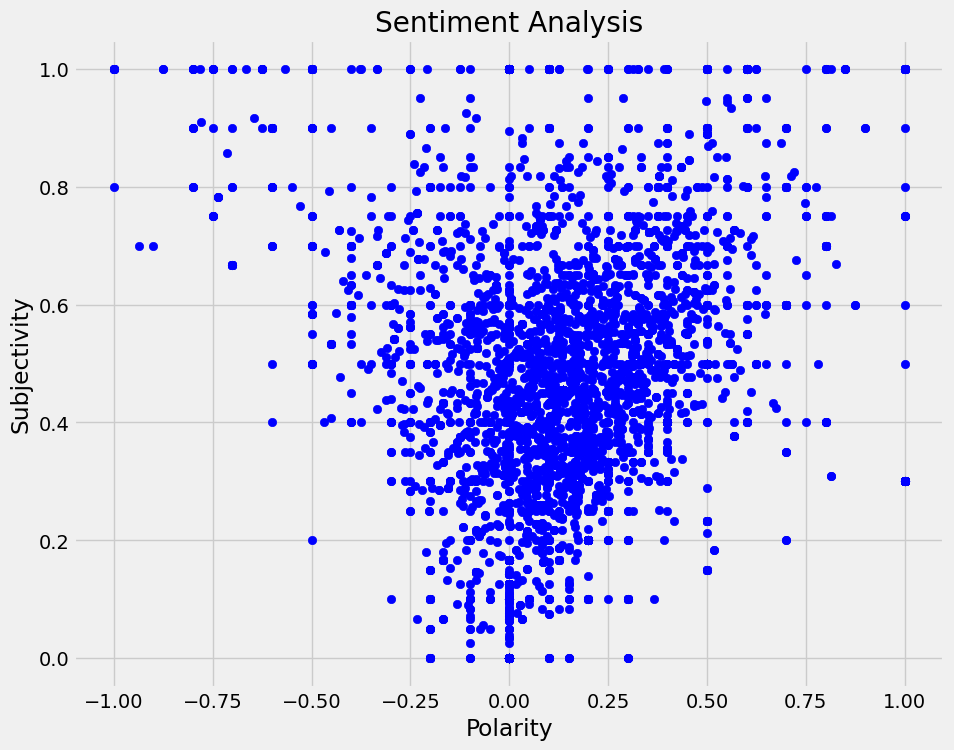

In [12]:
plt.figure(figsize=(10,8))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i],color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

Export csv file into analysedData.csv

In [ ]:
df.to_csv('analysedData.csv', index=False)

Make percentage of analysis category into pie chart

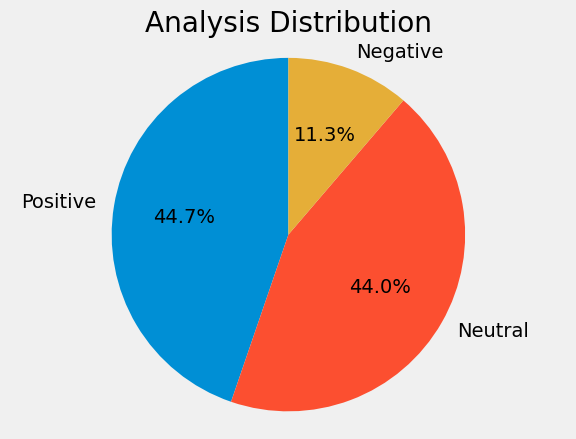

In [15]:
# Read the dataset

analysis_counts = df['Analysis'].value_counts()
plt.pie(analysis_counts, labels=analysis_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Analysis Distribution')
plt.show()

Category and Wordcloud
What is the overall sentiment distribution of tweets about the Apple iPhone 14 (positive, negative, neutral)?

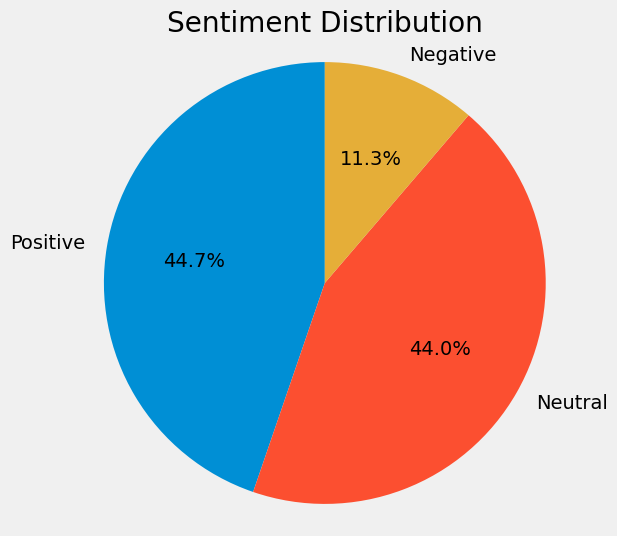

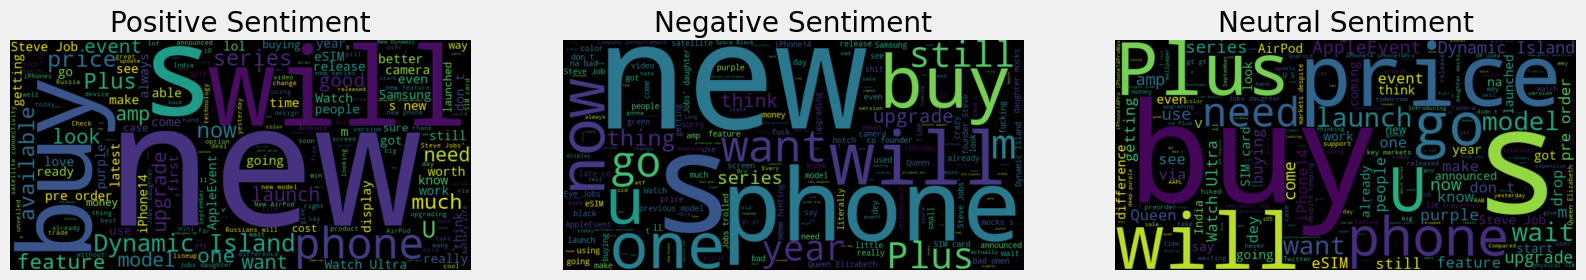

In [23]:
# Get the count of each sentiment category
sentiment_counts = df['Analysis'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()


cleaned_text = df['tweet_text'].str.replace('https|iphone|pro|apple|max', '', flags=re.IGNORECASE, regex=True)

# Generate word cloud for the tweet_text column
positive_tweets = df[df['Analysis'] == 'Positive']['tweet_text']
negative_tweets = df[df['Analysis'] == 'Negative']['tweet_text']
neutral_tweets = df[df['Analysis'] == 'Neutral']['tweet_text']

# Concatenate all tweets for each sentiment category
positive_text = ' '.join(positive_tweets)
negative_text = ' '.join(negative_tweets)
neutral_text = ' '.join(neutral_tweets)

# Create word clouds for each sentiment category
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Positive sentiment word cloud
wordcloud_positive = WordCloud(width=800, height=400).generate(positive_text)
axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].set_title('Positive Sentiment')
axes[0].axis('off')

# Negative sentiment word cloud
wordcloud_negative = WordCloud(width=800, height=400).generate(negative_text)
axes[1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1].set_title('Negative Sentiment')
axes[1].axis('off')

# Neutral sentiment word cloud
wordcloud_neutral = WordCloud(width=800, height=400).generate(neutral_text)
axes[2].imshow(wordcloud_neutral, interpolation='bilinear')
axes[2].set_title('Neutral Sentiment')
axes[2].axis('off')

plt.show()

Bar Chart
How does sentiment towards the iPhone 14 vary over time, from its announcement to its release and beyond?

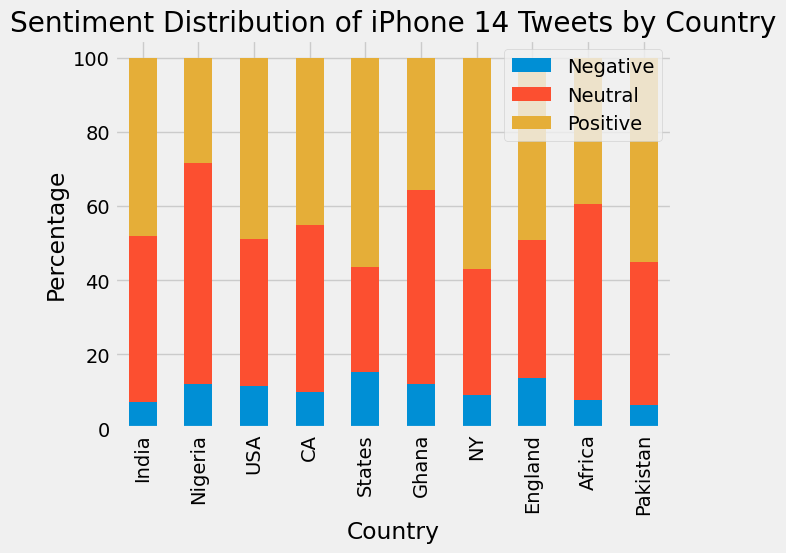

In [41]:
df['Country'] = df['location'].str.extract(r'\b(\w+)$')

# Group data by country and sentiment
grouped_data = df.groupby(['Country', 'Analysis']).size().unstack()

# Calculate the tweet count for each country
tweet_count = grouped_data.sum(axis=1)

# Sort the countries by tweet count and get the top 10
top_10_countries = tweet_count.nlargest(10).index

# Filter the data for the top 10 countries
filtered_data = grouped_data.loc[top_10_countries]

# Calculate the percentage distribution
total_count = filtered_data.sum(axis=1)
percentage_data = filtered_data.divide(total_count, axis=0) * 100

# Plot the stacked bar chart
percentage_data.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Sentiment Distribution of iPhone 14 Tweets by Country')

# Display the legend
plt.legend()

# Display the chart
plt.show()


big Followers sentiment

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (3,).

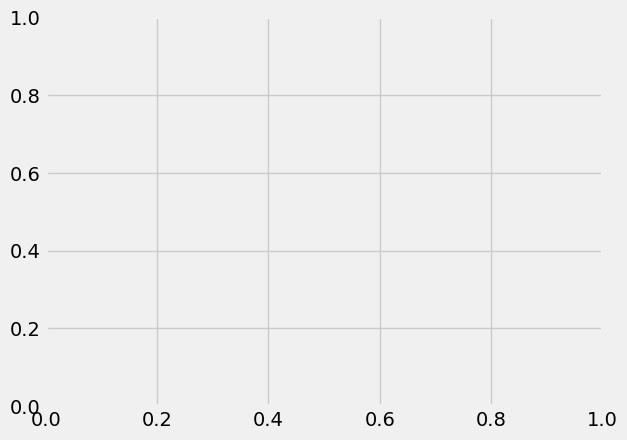

In [45]:
follower_categories = ['1000-10000', '10001-100000', '100001-1000000', '1000000+']

# Initialize sentiment counts for each follower category
sentiment_counts = {
    'Positive': [0, 0, 0, 0],
    'Negative': [0, 0, 0, 0],
    'Neutral': [0, 0, 0, 0]
}

# Iterate over the dataset
for index, row in df.iterrows():
    follower_count = row['follower']
    sentiment = row['Analysis']

    # Assign the sentiment count to the corresponding follower category
    if 1000 <= follower_count <= 10000:
        sentiment_counts[sentiment][0] += 1
    elif 10001 <= follower_count <= 100000:
        sentiment_counts[sentiment][1] += 1
    elif 100001 <= follower_count <= 1000000:
        sentiment_counts[sentiment][2] += 1
    elif follower_count > 1000000:
        sentiment_counts[sentiment][3] += 1

# Prepare data for visualization
positive_counts = np.array([count[0] for count in sentiment_counts.values()])
negative_counts = np.array([count[1] for count in sentiment_counts.values()])
neutral_counts = np.array([count[2] for count in sentiment_counts.values()])

# Plot the stacked bar chart
bar_width = 0.35
index = np.arange(len(follower_categories))

plt.bar(index, positive_counts, width=bar_width, label='Positive', color='green')
plt.bar(index, negative_counts, width=bar_width, bottom=positive_counts, label='Negative', color='red')
plt.bar(index, neutral_counts, width=bar_width, bottom=positive_counts + negative_counts, label='Neutral', color='gray')

# Set the title and labels
plt.title('Sentiment Distribution by Follower Categories')
plt.xlabel('Follower Categories')
plt.ylabel('Tweet Count')

# Set the x-axis tick labels
plt.xticks(index, follower_categories)

# Add a legend
plt.legend()

# Display the chart
plt.show()

Bar chart for number of positivity

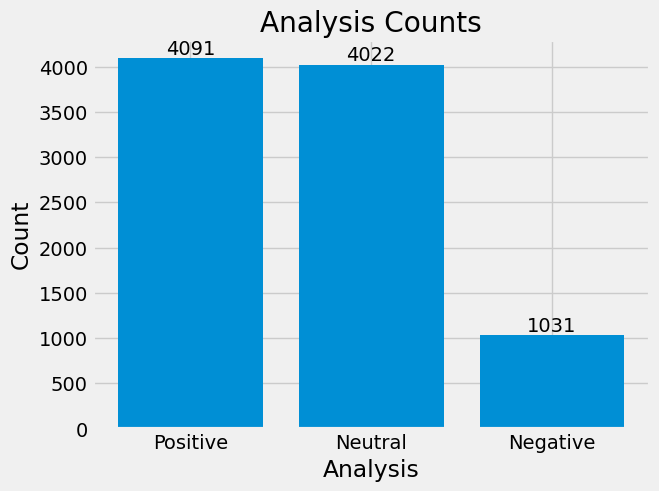

In [42]:
analysis_counts = df['Analysis'].value_counts()

plt.bar(analysis_counts.index, analysis_counts)
for i, count in enumerate(analysis_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
plt.title('Analysis Counts')
plt.xlabel('Analysis')
plt.ylabel('Count')
plt.show()